## Experiment No. 4 - Evaluating Sample-Average Methods in Nonstationary Bandit Problems

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the in which all the q∗(a) start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the q∗(a) on each step). Prepare plots (like Figure 2.2 in the book) for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, α=0.1. Use ϵ=0.1 and longer runs, say of 10,000 steps.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [ ]:
num_actions = 10  # Number of bandit arms
num_steps = 10000  # Number of time steps
num_runs = 2000  # Number of runs for averaging results
epsilon = 0.1  # Epsilon for epsilon-greedy action selection
alpha = 0.1  # Step-size for constant update method
std_dev = 0.01  # Standard deviation for random walk

In [ ]:
# Function to run the bandit simulation
def run_bandit(sample_avg=True):
    avg_rewards = np.zeros(num_steps)
    optimal_action_counts = np.zeros(num_steps)

    for run in range(num_runs):
        q_true = np.zeros(num_actions)  # Initialize action values
        q_est = np.zeros(num_actions)  # Estimated action values
        action_counts = np.zeros(num_actions)  # Action selection counts
        optimal_action = np.argmax(q_true)

        rewards = []
        optimal_choices = []

        for step in range(num_steps):
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = np.random.choice(num_actions)  # Exploration
            else:
                action = np.argmax(q_est)  # Exploitation

            reward = np.random.randn() + q_true[action]  # Sample reward

            # Update estimates
            action_counts[action] += 1
            if sample_avg:
                q_est[action] += (reward - q_est[action]) / action_counts[action]  # Sample average
            else:
                q_est[action] += alpha * (reward - q_est[action])  # Constant step size

            # Track performance
            rewards.append(reward)
            optimal_choices.append(1 if action == optimal_action else 0)

            # Update true values with random walk
            q_true += np.random.normal(0, std_dev, num_actions)
            optimal_action = np.argmax(q_true)  # Update optimal action

        avg_rewards += np.array(rewards)
        optimal_action_counts += np.array(optimal_choices)

    avg_rewards /= num_runs
    optimal_action_counts /= num_runs
    return avg_rewards, optimal_action_counts

In [ ]:
# Run experiments
avg_rewards_sample, opt_actions_sample = run_bandit(sample_avg=True)
avg_rewards_step, opt_actions_step = run_bandit(sample_avg=False)


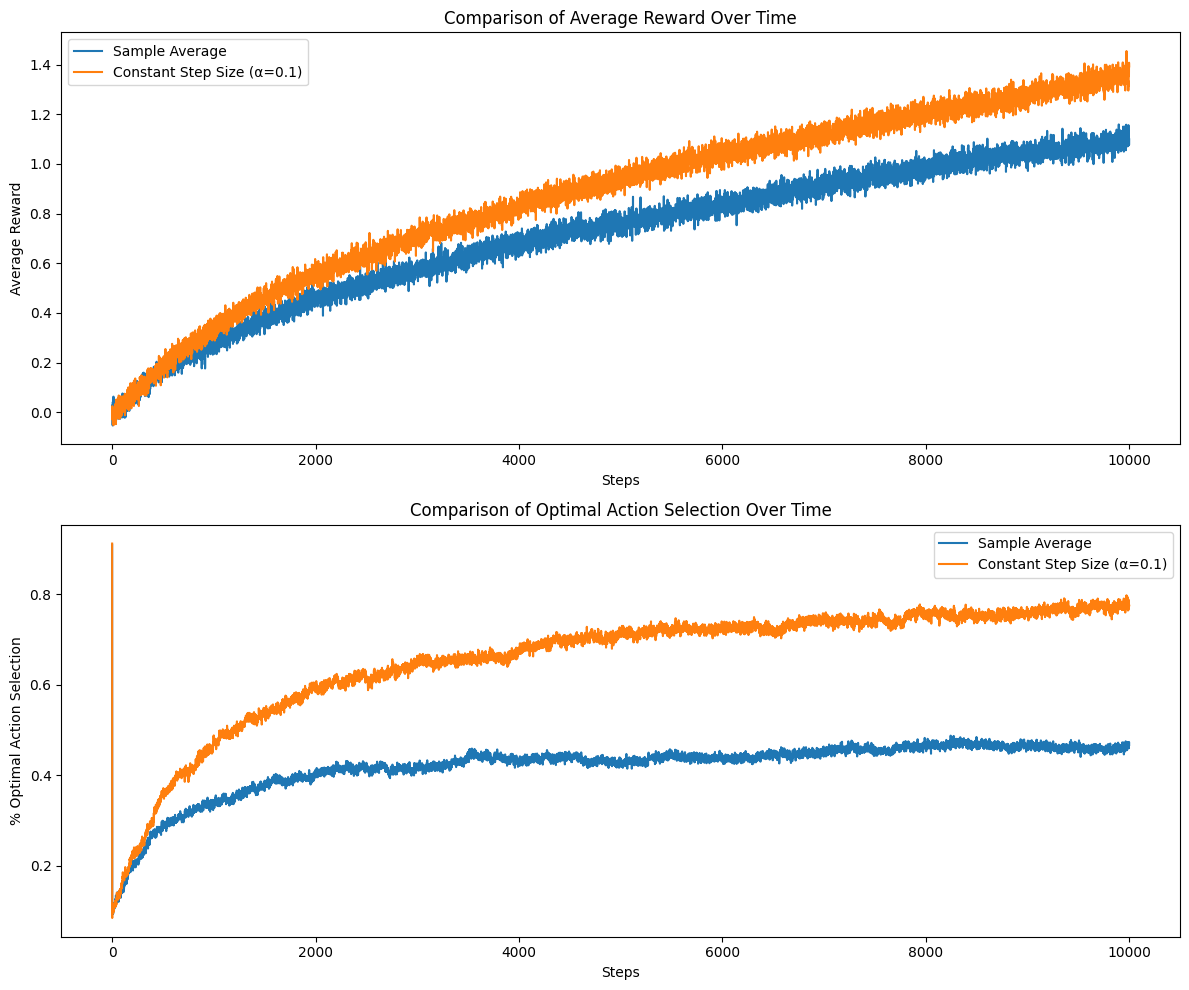

In [ ]:
# Plot results
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(avg_rewards_sample, label="Sample Average")
plt.plot(avg_rewards_step, label="Constant Step Size (α=0.1)")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Comparison of Average Reward Over Time")

plt.subplot(2, 1, 2)
plt.plot(opt_actions_sample, label="Sample Average")
plt.plot(opt_actions_step, label="Constant Step Size (α=0.1)")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action Selection")
plt.legend()
plt.title("Comparison of Optimal Action Selection Over Time")

plt.tight_layout()
plt.show()


## Sample average method

In [ ]:
# Function to run the bandit simulation using sample average method
def run_bandit_sample_average():
    avg_rewards = np.zeros(num_steps)
    optimal_action_counts = np.zeros(num_steps)

    for run in range(num_runs):
        q_true = np.zeros(num_actions)  # Initialize action values
        q_est = np.zeros(num_actions)  # Estimated action values
        action_counts = np.zeros(num_actions)  # Action selection counts
        optimal_action = np.argmax(q_true)

        rewards = []
        optimal_choices = []

        for step in range(num_steps):
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = np.random.choice(num_actions)  # Exploration
            else:
                action = np.argmax(q_est)  # Exploitation

            reward = np.random.randn() + q_true[action]  # Sample reward

            # Update estimates using sample average method
            action_counts[action] += 1
            q_est[action] += (reward - q_est[action]) / action_counts[action]

            # Track performance
            rewards.append(reward)
            optimal_choices.append(1 if action == optimal_action else 0)

            # Update true values with random walk
            q_true += np.random.normal(0, std_dev, num_actions)
            optimal_action = np.argmax(q_true)  # Update optimal action

        avg_rewards += np.array(rewards)
        optimal_action_counts += np.array(optimal_choices)

    avg_rewards /= num_runs
    optimal_action_counts /= num_runs

    # Plot results for sample average method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards)
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.title("Sample Average Method - Average Reward")

    plt.subplot(1, 2, 2)
    plt.plot(optimal_action_counts)
    plt.xlabel("Steps")
    plt.ylabel("% Optimal Action Selection")
    plt.title("Sample Average Method - Optimal Action Selection")

    plt.tight_layout()
    plt.show()

    return avg_rewards, optimal_action_counts

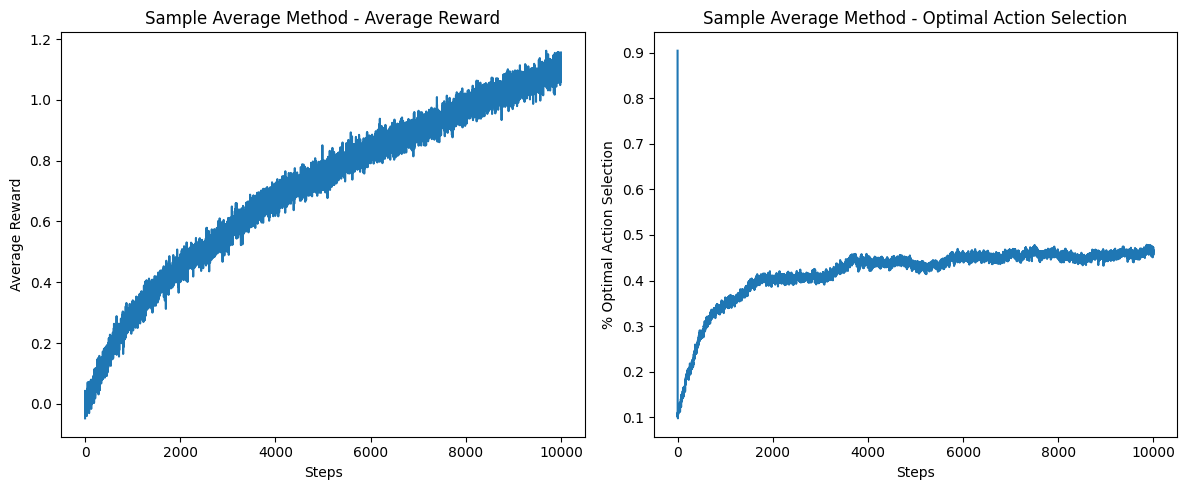

In [ ]:
avg_rewards_sample, opt_actions_sample = run_bandit_sample_average()

## Constant step-size method

In [ ]:
# Function to run the bandit simulation using constant step-size method
def run_bandit_constant_step():
    avg_rewards = np.zeros(num_steps)
    optimal_action_counts = np.zeros(num_steps)

    for run in range(num_runs):
        q_true = np.zeros(num_actions)  # Initialize action values
        q_est = np.zeros(num_actions)  # Estimated action values
        optimal_action = np.argmax(q_true)

        rewards = []
        optimal_choices = []

        for step in range(num_steps):
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = np.random.choice(num_actions)  # Exploration
            else:
                action = np.argmax(q_est)  # Exploitation

            reward = np.random.randn() + q_true[action]  # Sample reward

            # Update estimates using constant step-size method
            q_est[action] += alpha * (reward - q_est[action])

            # Track performance
            rewards.append(reward)
            optimal_choices.append(1 if action == optimal_action else 0)

            # Update true values with random walk
            q_true += np.random.normal(0, std_dev, num_actions)
            optimal_action = np.argmax(q_true)  # Update optimal action

        avg_rewards += np.array(rewards)
        optimal_action_counts += np.array(optimal_choices)

    avg_rewards /= num_runs
    optimal_action_counts /= num_runs

    # Plot results for constant step-size method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(avg_rewards)
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.title("Constant Step-Size Method - Average Reward")

    plt.subplot(1, 2, 2)
    plt.plot(optimal_action_counts)
    plt.xlabel("Steps")
    plt.ylabel("% Optimal Action Selection")
    plt.title("Constant Step-Size Method - Optimal Action Selection")

    plt.tight_layout()
    plt.show()

    return avg_rewards, optimal_action_counts

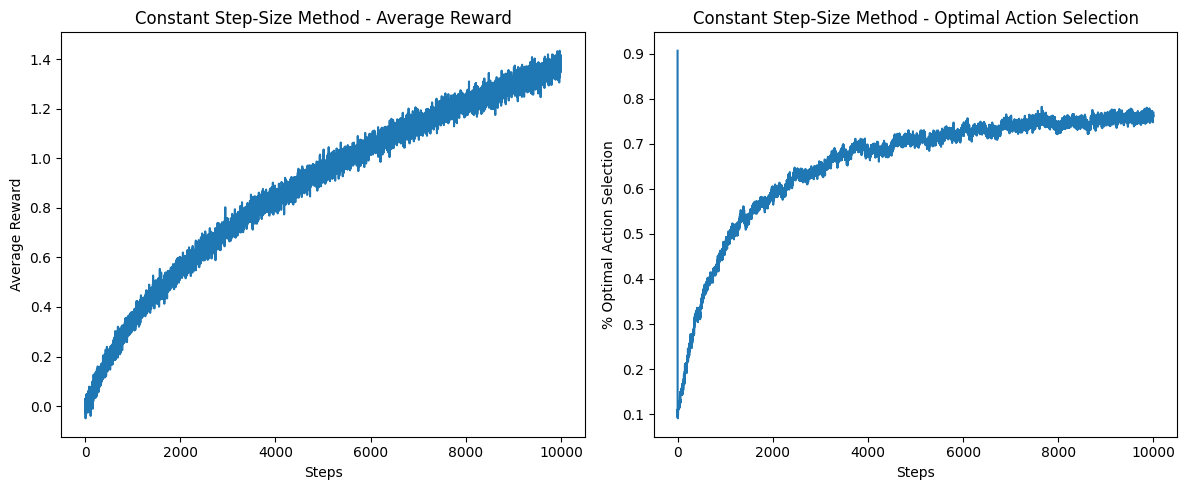

In [ ]:
avg_rewards_step, opt_actions_step = run_bandit_constant_step()

## Plot results to compare both methods

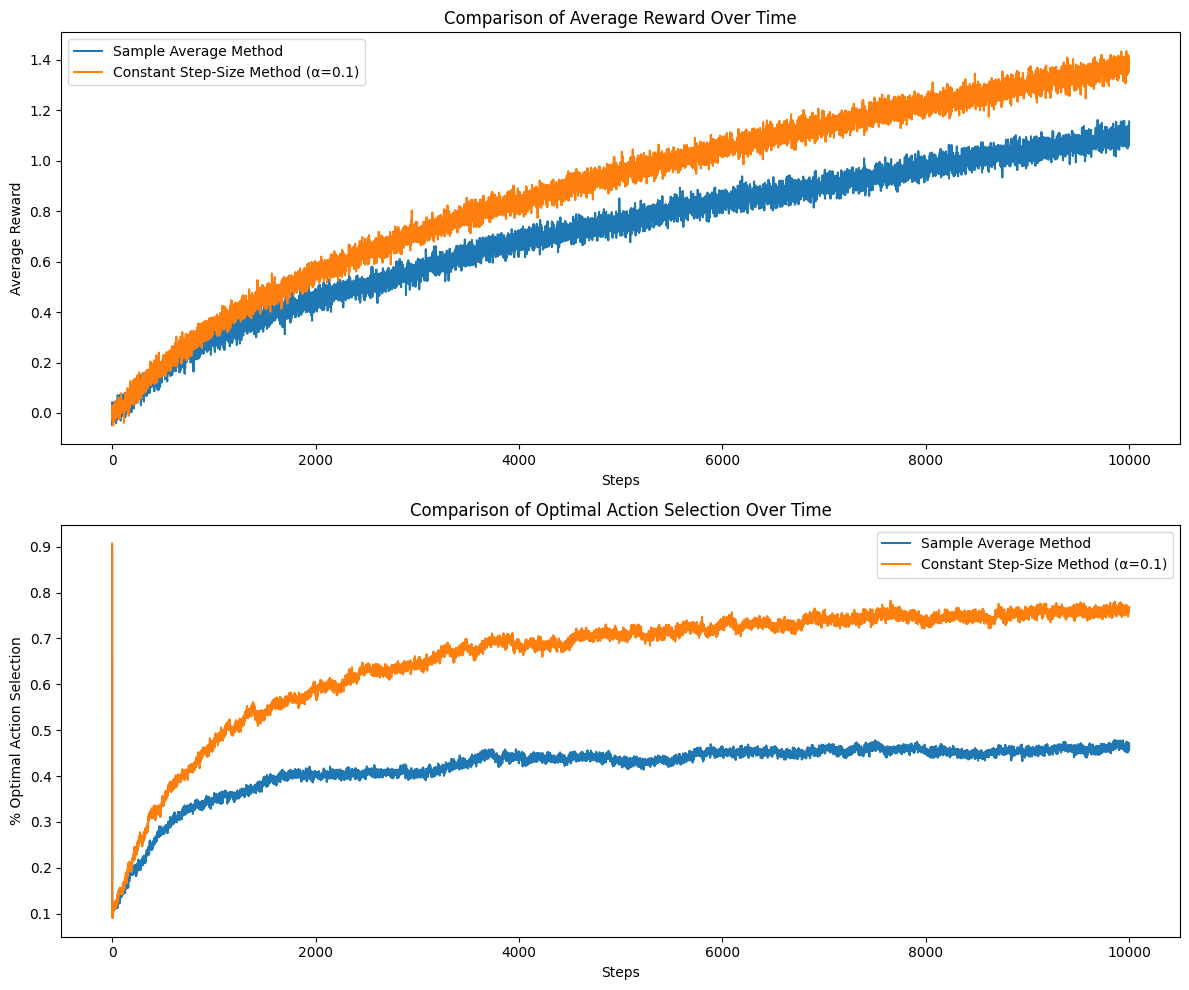

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(avg_rewards_sample, label="Sample Average Method")
plt.plot(avg_rewards_step, label="Constant Step-Size Method (α=0.1)")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()
plt.title("Comparison of Average Reward Over Time")

plt.subplot(2, 1, 2)
plt.plot(opt_actions_sample, label="Sample Average Method")
plt.plot(opt_actions_step, label="Constant Step-Size Method (α=0.1)")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action Selection")
plt.legend()
plt.title("Comparison of Optimal Action Selection Over Time")

plt.tight_layout()
plt.show()